### Introduction
There is literally no point in going after *traditional algo trading strategies* like **SMA crossover** or **RSI threshold breakout strategy** as it has proven to be obsolete given their simplistic nature and more importantly, the massive volume of participants who are trying to implement them in the market.

###The Trading Strategy
Our trading strategy follows the principle of simplicity yet a very effective breakout strategy.

* We enter the market if: the stock’s current high exceeds the 50-week high

* We exit the market if: the stock’s current low sinks below the 40-week low

We’ll be using the Donchian Channel indicator in order to keep track of the 50-week high and the 40-week low.

This strategy is a **weekly trading system**, so, we’ll be backtesting it on the weekly timeframe.

### Importing Libraries
we are going to use four primary packages which are *pandas*, *requests*, *pandas_ta* and *matplotlib* , and the secondary/optional packages include *termcolor* and *math*. The following code will import all the mentioned packages into our Python environment:

In [ ]:
#Installing Libraries not available in Google Colab

!pip install pandas-ta
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
# IMPORTING PACKAGES

import pandas as pd
import requests
import pandas_ta as ta
import matplotlib.pyplot as plt
from termcolor import colored as cl
import math
import yfinance as yf

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

In [12]:
aapl = yf.download("aapl", start="1993-01-01", end="2023-12-31", interval="1wk")
aapl.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-27,166.910004,177.779999,166.830002,177.570007,177.336380,288745800
2023-11-03,174.240005,184.119995,173.350006,182.410004,182.169998,317238800
2023-11-10,183.970001,190.960007,183.529999,189.710007,189.460403,278072700
2023-11-17,190.250000,192.929993,188.570007,191.309998,191.309998,175180000
2023-11-24,190.869995,192.089996,188.190002,189.949997,189.949997,194824900
2023-12-01,190.330002,195.000000,187.449997,194.270004,194.270004,244264600
2023-12-08,194.199997,199.619995,191.419998,198.110001,198.110001,304253700
2023-12-15,197.529999,198.399994,193.500000,194.679993,194.679993,323448000
2023-12-22,195.179993,195.410004,191.089996,193.580002,193.580002,148179700


###Donchian Channel Calculation
If we dive deep into the mathematics of the indicator, it will demand a separate article on its own for the explanations.

So here's a general overview of the indicator. Basically, the Donchian Channel reveals the **highest high** and the **lowest low** of a stock over a specified period of time.

The following code uses pandas_ta for the calculation of the indicator:

In [ ]:
# CALCULATING DONCHIAN CHANNEL

aapl[['dcl', 'dcm', 'dcu']] = aapl.ta.donchian(lower_length = 40, upper_length = 50)
print(aapl.index.name)
aapl.tail(10)

### PLOTTING DONCHIAN CHANNEL

To get a better view of the Donchian Channel indicator, let’s plot the calculated values using the Matplotlib library:

Text(0, 0.5, 'Close')

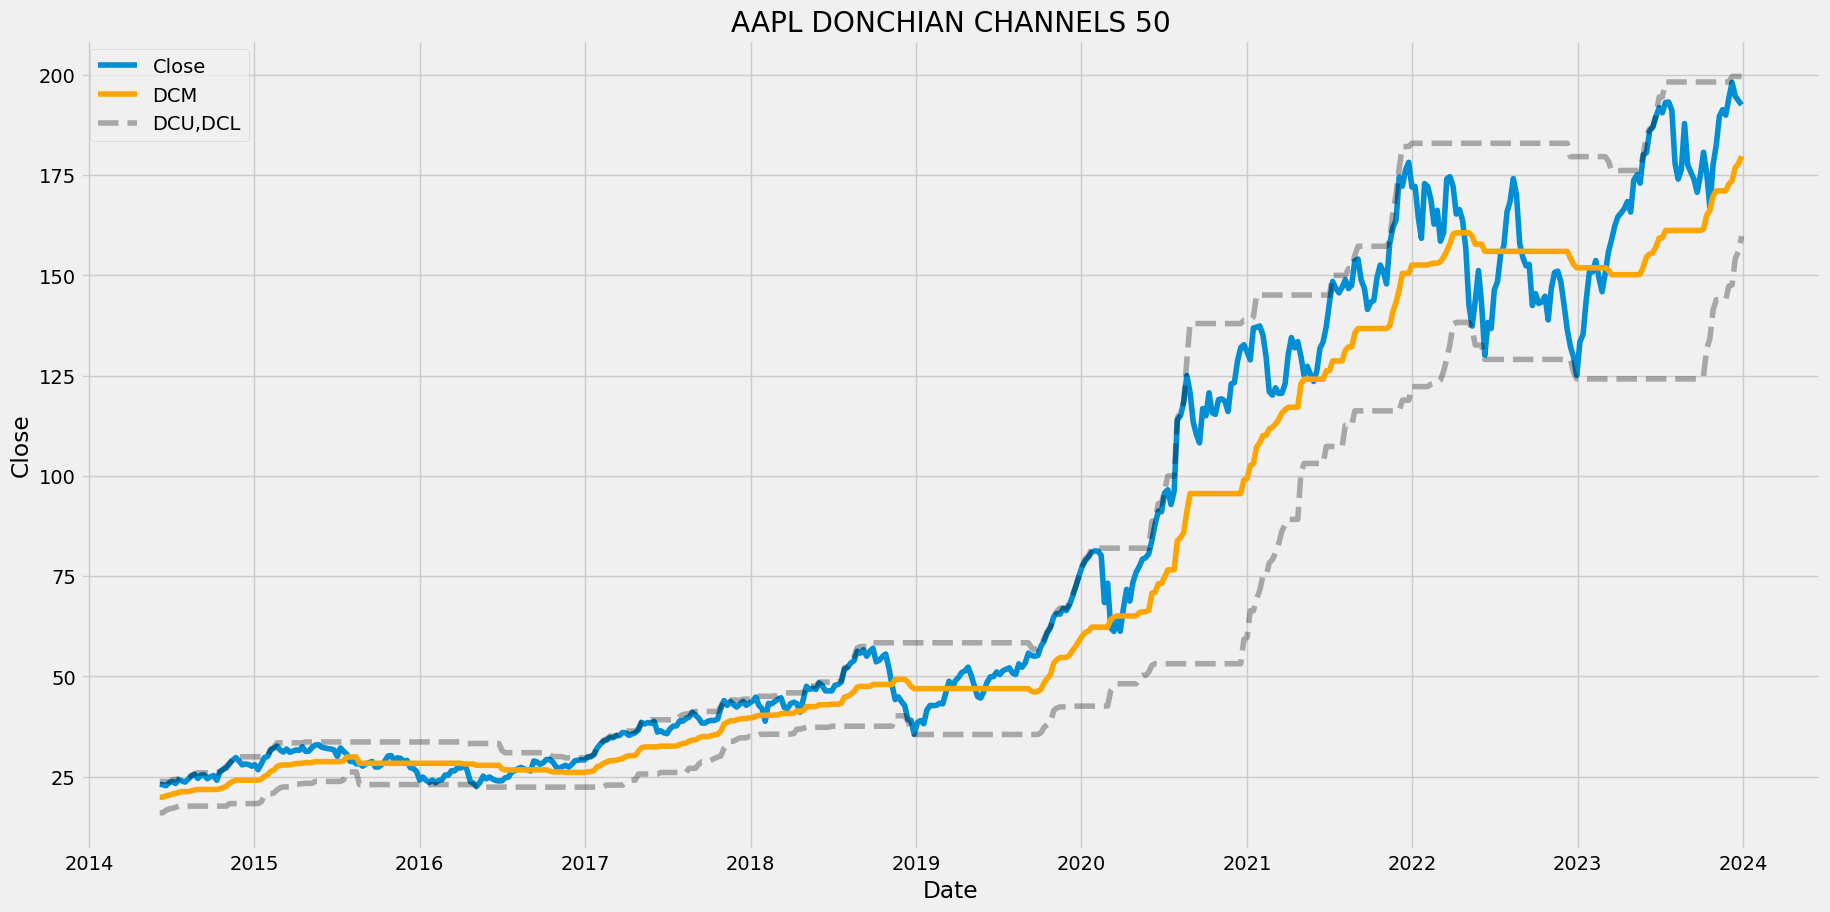

In [27]:
# PLOTTING DONCHIAN CHANNEL

plt.plot(aapl[-500:].Close, label = 'Close')
plt.plot(aapl[-500:].dcl, color = 'black', linestyle = '--', alpha = 0.3)
plt.plot(aapl[-500:].dcm, color = 'orange', label = 'DCM')
plt.plot(aapl[-500:].dcu, color = 'black', linestyle = '--', alpha = 0.3, label = 'DCU,DCL')
plt.legend()
plt.title('AAPL DONCHIAN CHANNELS 50')
plt.xlabel('Date')
plt.ylabel('Close')

### Observations

From the plot it can be observed that there are three important components in the Donchian Channel Indicator:

* **Upper Band**: The upper band reveals the highest high of the stock over a specified period of time.
* **Lower Band**: Basically the opposite of the upper band, it shows the lowest low of the stock over a specified period of time.
* **Middle Band**: This component is a little different. It shows the average between the upper band and the lower band.

Donchian Channel is one of the most widely used indicators for observing breakouts happening in stock price movements and that's one of the core reasons for using it

### Backtesting the Strategy
We have arrived at one of the most important steps, which is backtesting our breakout strategy.

We are going to follow a very basic and straightforward system of backtesting for the sake of simplicity.

The following code backtests the strategy and reveals its results:

In [26]:
# BACKTESTING THE STRATEGY

def implement_strategy(aapl, investment):

    in_position = False
    equity = investment

    for i in range(3, len(aapl)):
        if aapl['High'][i] == aapl['dcu'][i] and in_position == False:
            no_of_shares = math.floor(equity/aapl.Close[i])
            equity -= (no_of_shares * aapl.Close[i])
            in_position = True
            print(cl('BUY: ', color = 'green', attrs = ['bold']), f'{no_of_shares} Shares are bought at ${aapl.Close[i]} on {str(aapl.index[i])[:10]}')
        elif aapl['Low'][i] == aapl['dcl'][i] and in_position == True:
            equity += (no_of_shares * aapl.Close[i])
            in_position = False
            print(cl('SELL: ', color = 'red', attrs = ['bold']), f'{no_of_shares} Shares are bought at ${aapl.Close[i]} on {str(aapl.index[i])[:10]}')
    if in_position == True:
        equity += (no_of_shares * aapl.Close[i])
        print(cl(f'\nClosing position at {aapl.Close[i]} on {str(aapl.index[i])[:10]}', attrs = ['bold']))
        in_position = False

    earning = round(equity - investment, 2)
    roi = round(earning / investment * 100, 2)
    print(cl(f'EARNING: ${earning} ; ROI: {roi}%', attrs = ['bold']))

implement_strategy(aapl, 100000)

BUY:  272340 Shares are bought at $0.3671880066394806 on 1994-10-07
SELL:  272340 Shares are bought at $0.31529000401496887 on 1995-10-06
BUY:  329490 Shares are bought at $0.26060301065444946 on 1997-08-01
SELL:  329490 Shares are bought at $0.1171879991889 on 1997-12-26
BUY:  151077 Shares are bought at $0.25558000802993774 on 1998-04-10
SELL:  151077 Shares are bought at $0.3939729928970337 on 2000-09-29
BUY:  131174 Shares are bought at $0.45375001430511475 on 2002-04-12
SELL:  131174 Shares are bought at $0.26767900586128235 on 2002-07-12
BUY:  102732 Shares are bought at $0.3417859971523285 on 2003-06-13
SELL:  102732 Shares are bought at $2.1607139110565186 on 2006-07-14
BUY:  68821 Shares are bought at $3.2253570556640625 on 2006-11-17
SELL:  68821 Shares are bought at $3.575000047683716 on 2008-09-26
BUY:  40655 Shares are bought at $6.051785945892334 on 2009-08-21
SELL:  40655 Shares are bought at $18.633214950561523 on 2012-12-14
BUY:  37349 Shares are bought at $20.28214263

### Conclusion
Basically, the program executes the trades based on the conditions that are satisfied.

It enters the market when our entry condition is satisfied and exits when the exit condition is satisfied.

These are trades executed by our program followed by the backtesting results.

Reference
1. Nikhil Adithyan (2023) An Algo Trading Strategy: A Python Case Study: Backtesting of a simple breakout trading strategy with APIs and Python.
2. https://github.com/twopirllc/pandas-ta

